In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
customers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customers.csv')
products = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Transactions.csv')

In [6]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [7]:
print("Customers Data Overview:")
print(customers.info())
print("Products Data Overview:")
print(products.info())
print("Transactions Data Overview:")
print(transactions.info())

Customers Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
Products Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
Transactions Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   

In [8]:
print("Missing values in Customers:")
print(customers.isnull().sum())
print("Missing values in Products:")
print(products.isnull().sum())
print("Missing values in Transactions:")
print(transactions.isnull().sum())

Missing values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [9]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [10]:
print("Number of unique customers:", customers['CustomerID'].nunique())
print("Customer distribution by region:")
print(customers['Region'].value_counts())

Number of unique customers: 200
Customer distribution by region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


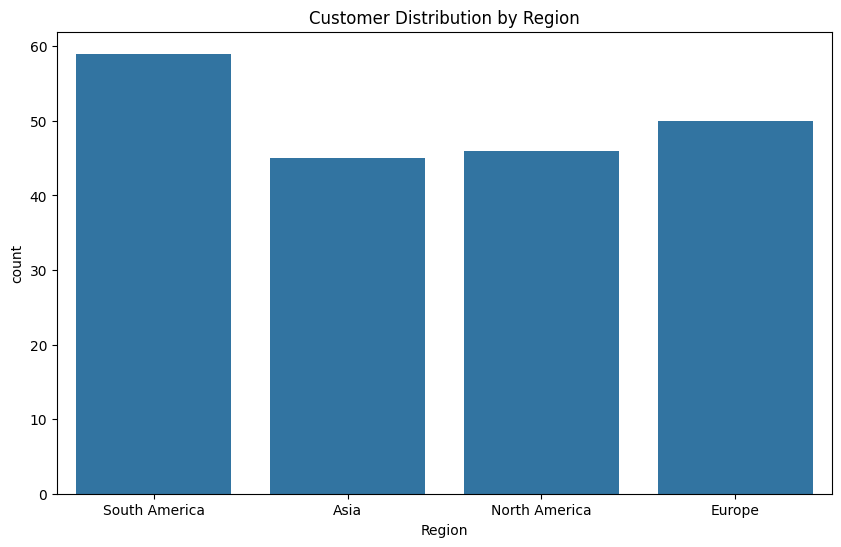

In [11]:
# Plot customer distribution by region
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=customers)
plt.title('Customer Distribution by Region')
plt.show()


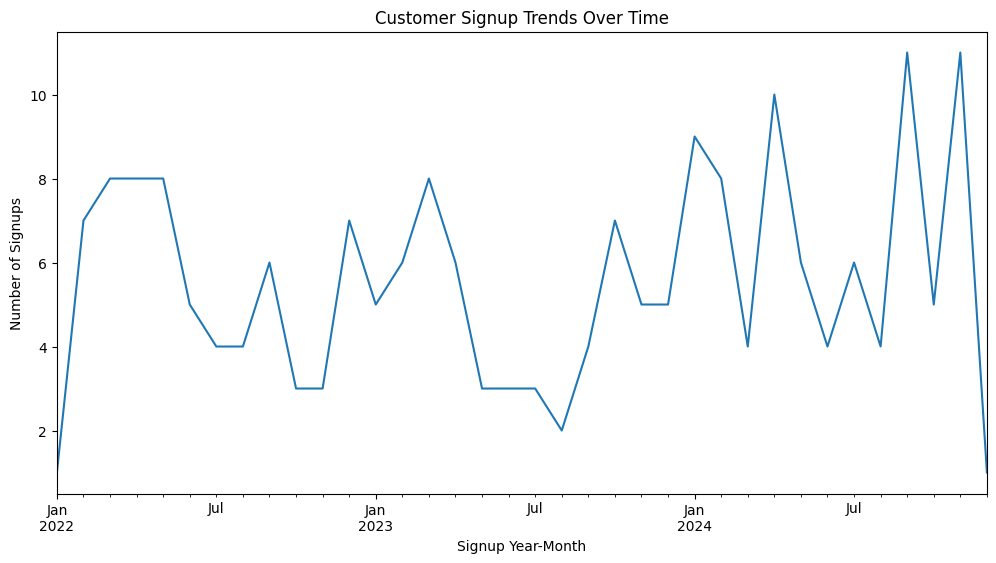

In [13]:
# Signup trends over time
customers['SignupYearMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers['SignupYearMonth'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
signup_trends.plot()
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Signup Year-Month')
plt.ylabel('Number of Signups')
plt.show()


In [14]:
# Product Analysis
print("Number of unique products:", products['ProductID'].nunique())
print("Product distribution by category:")
print(products['Category'].value_counts())

Number of unique products: 100
Product distribution by category:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


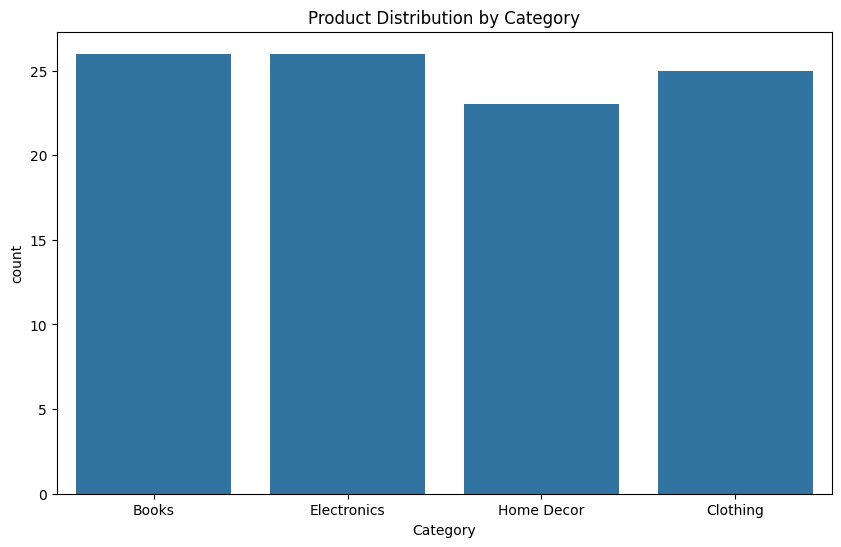

In [15]:
# Plot product distribution by category
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=products)
plt.title('Product Distribution by Category')
plt.show()

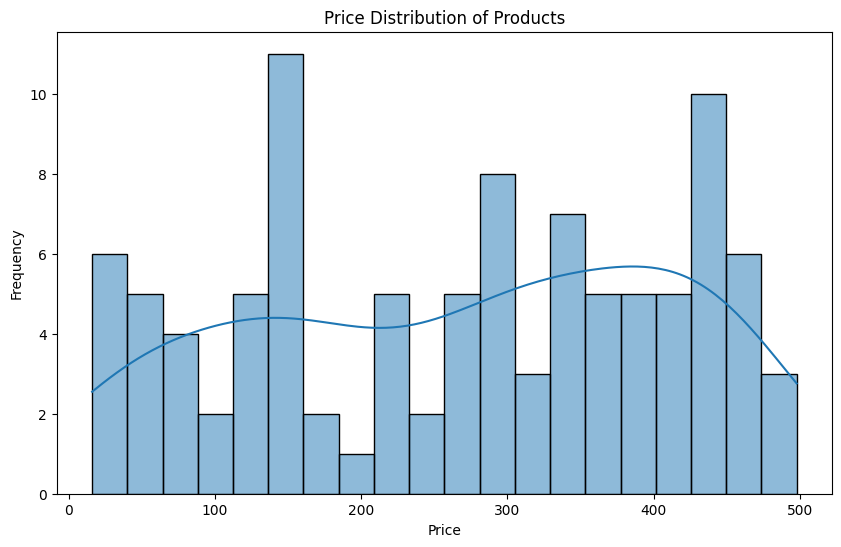

In [16]:
# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], bins=20, kde=True)
plt.title('Price Distribution of Products')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Transaction Analysis
print("Number of transactions:", transactions['TransactionID'].nunique())

Number of transactions: 1000


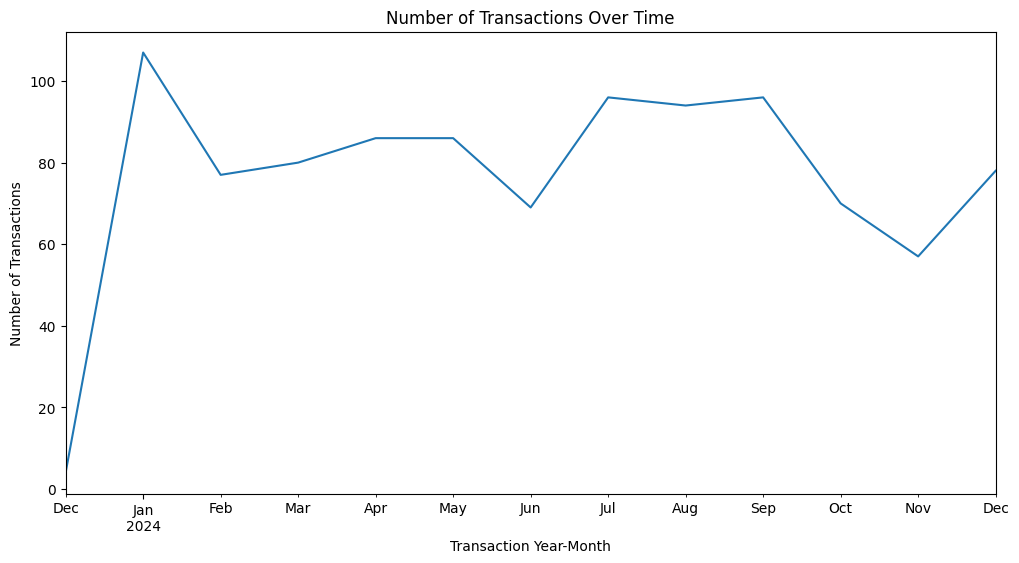

In [18]:
# Transactions over time
transactions['TransactionYearMonth'] = transactions['TransactionDate'].dt.to_period('M')
transaction_trends = transactions['TransactionYearMonth'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
transaction_trends.plot()
plt.title('Number of Transactions Over Time')
plt.xlabel('Transaction Year-Month')
plt.ylabel('Number of Transactions')
plt.show()

In [19]:
# Popular products based on quantity sold
popular_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
print("Top 10 popular products by quantity sold:")
print(popular_products.head(10))

Top 10 popular products by quantity sold:
ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64


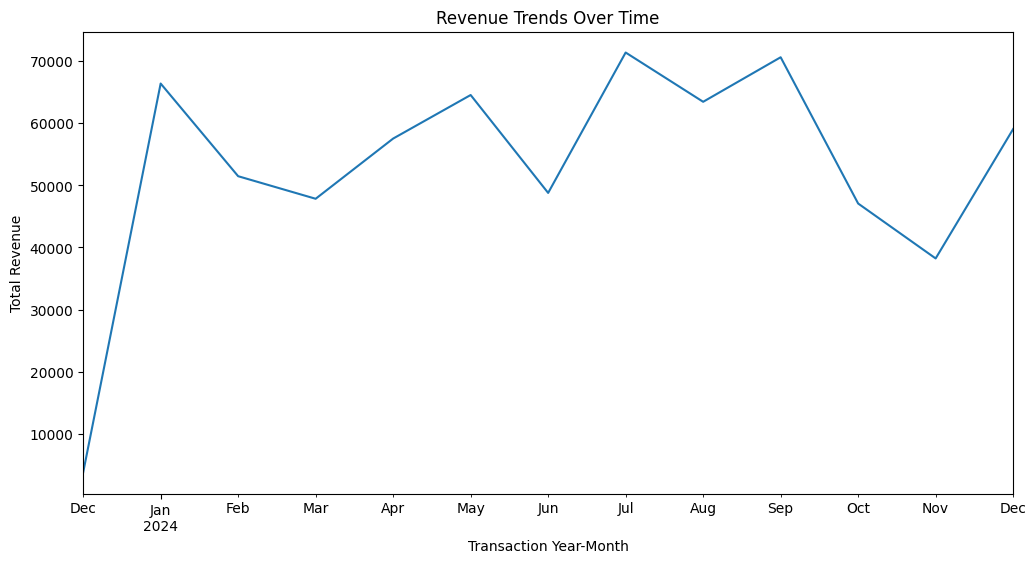

In [22]:
# Revenue trends over time
transactions['Revenue'] = transactions['Quantity'] * transactions['Price']
revenue_trends = transactions.groupby('TransactionYearMonth')['Revenue'].sum().sort_index()
plt.figure(figsize=(12, 6))
revenue_trends.plot()
plt.title('Revenue Trends Over Time')
plt.xlabel('Transaction Year-Month')
plt.ylabel('Total Revenue')
plt.show()

# New section